## import important libraries 

In [4]:
import warnings
# Ignore the warning
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, poisson, norm

# Load the dataset
df = pd.read_csv("Accommodation.csv")

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping


## Step 1: Statistics

In [7]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
df.describe()


Descriptive statistics for numerical columns:


,Longitude,Latitude
count,2339.000000,2339.000000
mean,-8.208845,53.069696
std,1.283439,0.905482
min,-10.514531,51.479594
25%,-9.374312,52.261228
50%,-8.436704,53.122920
75%,-7.023236,53.594261
max,-5.998080,55.361922


## Preprocessing of Dataset 

In [8]:
df.shape

(2339, 9)

In [9]:
# Check Null Value 
df.isnull()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2334,False,False,False,False,False,False,False,False,False
2335,False,False,False,False,False,False,False,False,False
2336,False,False,False,False,False,False,False,False,False
2337,False,False,False,False,False,False,False,False,False


In [10]:
# Count the Null Value Accoding the columns wise 
df.isnull().sum()

Name                 0
Url                161
Telephone            4
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    163
AddressCountry       0
Tags                 0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum().sum()

0

In [13]:
# Check Dublicate Columns 
# Check for duplicate values in specific columns
duplicate_in_column = df.duplicated()

# Display the rows with duplicate values in the specified columns
print("Duplicate values in specified columns:")
print(df[duplicate_in_column])

Duplicate values in specified columns:
Empty DataFrame
Columns: [Name, Url, Telephone, Longitude, Latitude, AddressRegion, AddressLocality, AddressCountry, Tags]
Index: []


In [14]:
descriptive_stats = df.describe()
print(descriptive_stats)
## diiffrence is clear after preprocess the dataset 

         Longitude     Latitude
count  2029.000000  2029.000000
mean     -8.173382    53.067448
std       1.300118     0.906434
min     -10.514531    51.479594
25%      -9.374026    52.259917
50%      -8.369672    53.124848
75%      -6.947458    53.548435
max      -5.998080    55.361922


##  Apply some graph for Visualize the Data

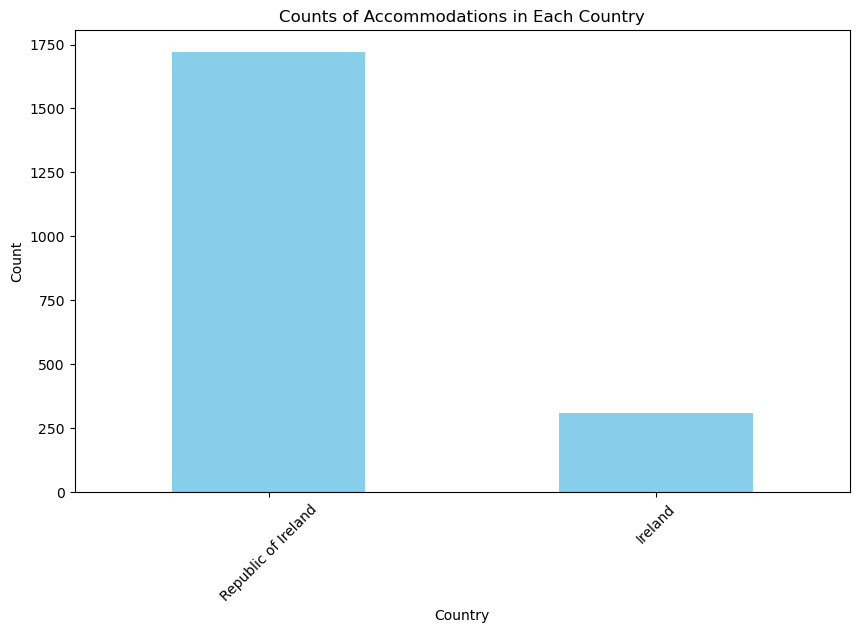

In [15]:
# Plot 1: Bar plot showing counts of accommodations in each AddressCountry
plt.figure(figsize=(10, 6))
df['AddressCountry'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Accommodations in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Replace 'Republic of Ireland' with 'Ireland' in the 'AddressCountry' column
df['AddressCountry'] = df['AddressCountry'].replace('Republic of Ireland', 'Ireland')

In [17]:
df.head(500)

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Ireland,Camping
5,Fossa Caravan and Camping Park,http://www.fossacampingkillarney.com,+353(0)646631497,-9.585609,52.070824,Kerry,Fossa,Ireland,Camping
6,Streamstown Caravan & Camping Park,http://www.tipperarycaravanpark.com,35350521519,-7.839326,52.957265,Tipperary,Roscrea,Ireland,Camping
...,...,...,...,...,...,...,...,...,...
579,Killadangan House,http://killadanganhouse.com/,+353(0)876689758,-9.597560,53.781206,Mayo,Westport,Ireland,Self Catering Accommodation
580,Rhu Glenn Country Club Hotel,http://www.rhuglennhotel.com,+353(0)51832242,-7.054185,52.297288,Waterford,Waterford City,Ireland,Hotel
581,Commons Inn,http://www.commonsinn.com,+353(0)214210300,-8.487611,51.921844,Cork,Cork City,Ireland,Hotel
582,Clare's Rock,http://www.claresrock.com,+353(0)863660641,-9.076840,53.034571,Clare,Carran,Ireland,"Hostel,Welcome Standard"


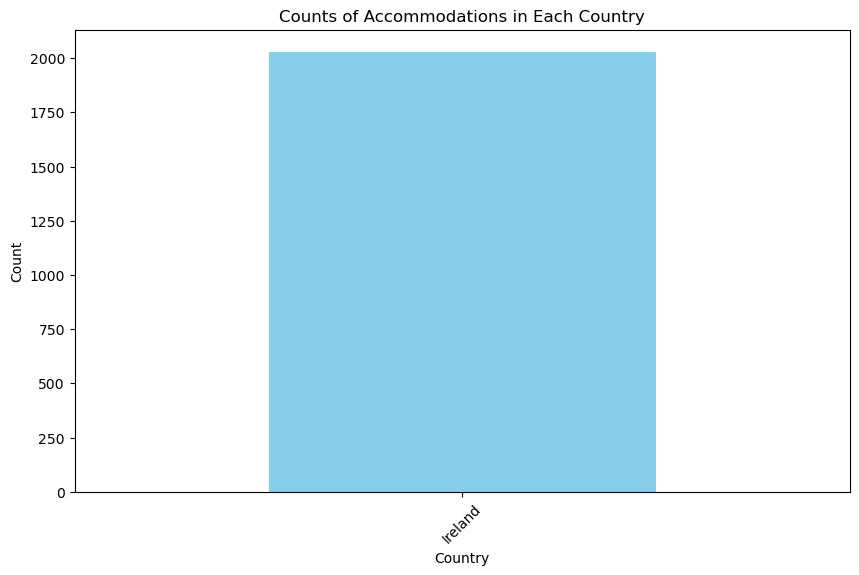

In [18]:
# Plot 1: Bar plot showing counts of accommodations in each AddressCountry
plt.figure(figsize=(10, 6))
df['AddressCountry'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Accommodations in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

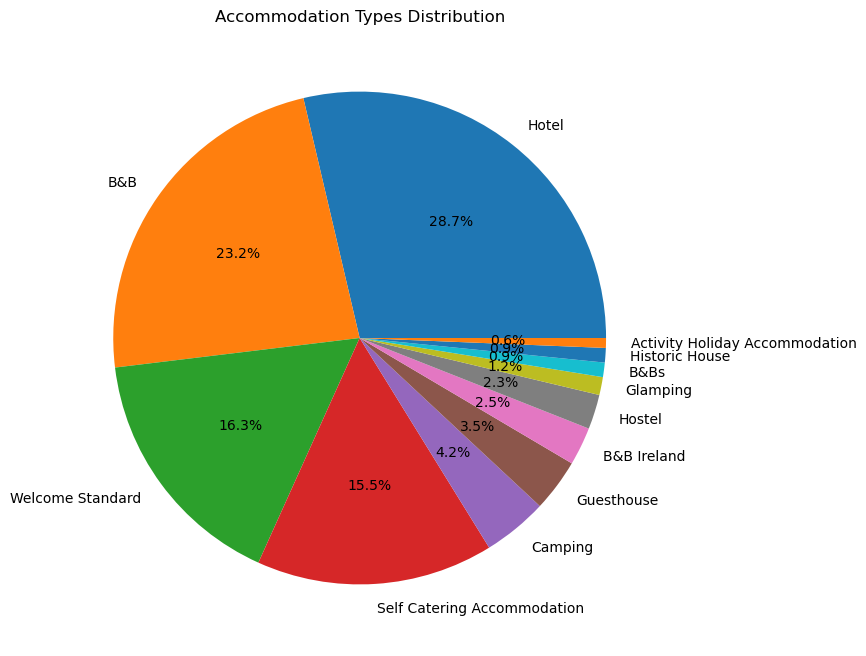

In [19]:
# Extract and plot accommodation types distribution
accommodation_types = df['Tags'].str.split(',').explode().str.strip().value_counts()
accommodation_types.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Accommodation Types Distribution')
plt.ylabel('')
plt.savefig('accommodation_types_distribution.png')
plt.show()

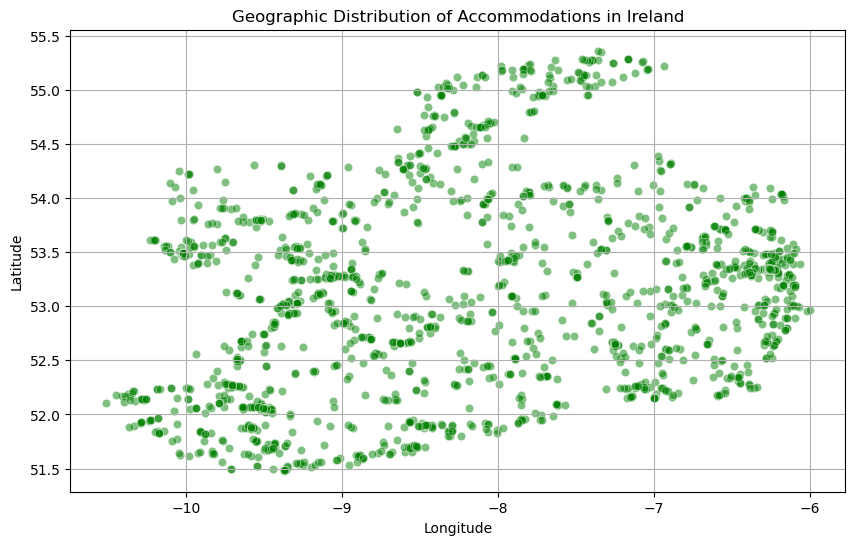

In [20]:
# Scatter Plot of Accommodation Longitude vs. Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, color='green', alpha=0.5)
plt.title('Geographic Distribution of Accommodations in Ireland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##   Analysis using Discrete Distributions (Binomial and Poisson)n


In [21]:
# Count the frequency of each tag in the 'Tags' column
tag_counts = df['Tags'].value_counts()

# Generate hypothetical data for 'Tags' frequency
tags_frequency = tag_counts.values

In [22]:
# Binomial Distribution
n = len(tags_frequency)  # Number of trials
p = 0.5  # Probability of success
binomial_dist = binom(n, p)
binomial_prob = binomial_dist.pmf(np.arange(0, tags_frequency.max() + 1))

In [23]:
# Poisson Distribution
poisson_lambda = tags_frequency.mean()
poisson_dist = poisson(poisson_lambda)
poisson_prob = poisson_dist.pmf(np.arange(0, tags_frequency.max() + 1))


In [26]:
# Calculate the mean count of accommodations across regions
mean_accommodations = region_counts.mean()
# Use Poisson distribution to model the count of accommodations
poisson_dist = poisson(mean_accommodations)
from scipy.stats import poisson
# Count the number of accommodations in each region
region_counts = df['AddressRegion'].value_counts()


NameError: name 'region_counts' is not defined